Importing data
---------------------


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None,na_values='?')

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
data.columns=["symbol","normalizedloss","make","fueltype","aspiration","noofdoors","bodystyle","drivewheels","englocation","wheelbase","length","width","height","curbweight","engtype","cylinders","engsize","fuelsystem","bore","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

In [6]:
data.normalizedloss.isnull().sum()

41

<h1 font-color=red>Data Cleaning Process</h1>

In [7]:
data.noofdoors.isnull().sum()

2

In [8]:
data.stroke.isnull().sum()

4

In [9]:
data.bore.isnull().sum()

4

In [10]:
data.horsepower.isnull().sum()

2

In [11]:
data.price.isnull().sum()

4

In [12]:
data.peakrpm.isnull().sum()

2

{'whiskers': [<matplotlib.lines.Line2D at 0x2c398199e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c3981a65b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c398199ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c3981a6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c3981b30a0>],
 'means': []}

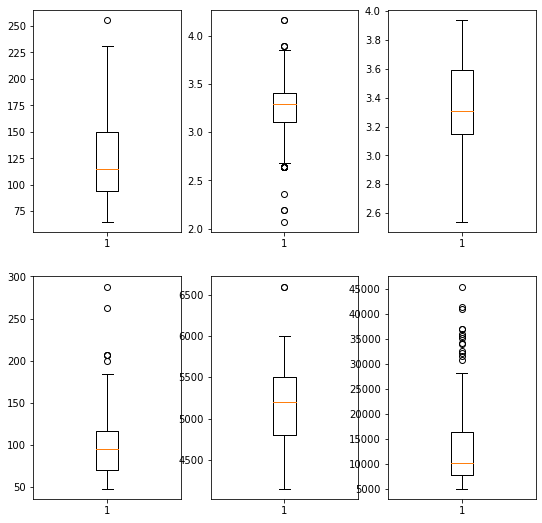

In [13]:
plt.figure(figsize=[9.0,9.0])
plt.subplot(2,3,1)
plt.boxplot(data.normalizedloss.dropna())
plt.subplot(2,3,2)
plt.boxplot(data.stroke.dropna())
plt.subplot(2,3,3)
plt.boxplot(data.bore.dropna())
plt.subplot(2,3,4)
plt.boxplot(data.horsepower.dropna())
plt.subplot(2,3,5)
plt.boxplot(data.peakrpm.dropna())
plt.subplot(2,3,6)
plt.boxplot(data.price.dropna())

In [14]:
data.normalizedloss.fillna(data.normalizedloss.median(),inplace=True)
data.noofdoors.fillna(value=str(data.noofdoors.mode()[0]),inplace=True)
data.stroke.fillna(data.stroke.median(),inplace=True)
data.bore.fillna(data.bore.mean(),inplace=True)
data.horsepower.fillna(data.horsepower.median(),inplace=True)
data.price.fillna(data.price.median(),inplace=True)
data.peakrpm.fillna(data.peakrpm.median(),inplace=True)

In [15]:
pearsonr(data.normalizedloss,data.price)

(0.0954889371225073, 0.17321440617487469)

In [16]:
pearsonr(data.wheelbase,data.price)

(0.5848468389722252, 3.3380170823698806e-20)

In [17]:
pearsonr(data.length,data.price)

(0.6865674442855645, 6.428844007376666e-30)

In [18]:
pearsonr(data.width,data.price)

(0.7245583242779026, 1.1789696449955338e-34)

In [19]:
pearsonr(data.height,data.price)

(0.1404388185142756, 0.044595778160436715)

In [20]:
pearsonr(data.bore,data.price)

(0.5328649013633636, 1.9629473253558344e-16)

In [21]:
pearsonr(data.stroke,data.price)

(0.08362710782152108, 0.23321191098304708)

In [22]:
pearsonr(data.compressionratio,data.price)

(0.07289043869078721, 0.2989754575667938)

In [23]:
pearsonr(data.horsepower,data.price)

(0.749919122902353, 2.770149464542438e-38)

In [24]:
pearsonr(data.peakrpm,data.price)

(-0.10728291460646908, 0.12574783680166737)

In [25]:
pearsonr(data.citympg,data.price)

(-0.6688215192284408, 6.034974884197538e-28)

In [26]:
pearsonr(data.highwaympg,data.price)

(-0.6930373012364783, 1.1310420947834282e-30)

In [27]:
train_y=data.price.iloc[0:164]
test_y=data.price.iloc[164:]
train_x_w=data.width.iloc[0:164]
test_x_w=data.width.iloc[164:]
train_x_w=sm.add_constant(train_x_w)
test_x_w=sm.add_constant(test_x_w)
model=sm.OLS(train_y,train_x_w).fit()
predict_x=model.predict(train_x_w)
model1=sm.OLS(test_y,test_x_w).fit()
predicted_x=model.predict(test_x_w)

D:\apps\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='width', ylabel='price'>

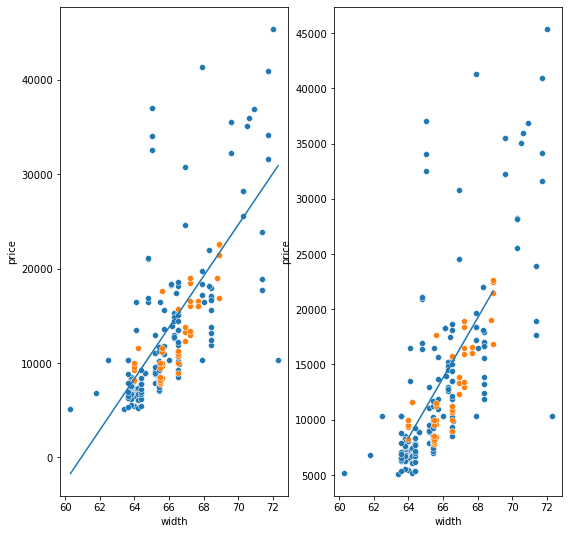

In [28]:
plt.figure(figsize=[9.0,9.0])
plt.subplot(1,2,1)
sns.scatterplot(x=train_x_w.width,y=train_y)
sns.scatterplot(x=test_x_w.width,y=test_y)
sns.lineplot(x=train_x_w.width,y=predict_x)
plt.subplot(1,2,2)
sns.scatterplot(x=train_x_w.width,y=train_y)
sns.scatterplot(x=test_x_w.width,y=test_y)
sns.lineplot(x=test_x_w.width,y=predicted_x)

In [29]:
train_x_hp=data.horsepower.iloc[0:164]
test_x_hp=data.horsepower.iloc[164:]
train_x_hp=sm.add_constant(train_x_hp)
test_x_hp=sm.add_constant(test_x_hp)
model=sm.OLS(train_y,train_x_hp).fit()
predict_xhp=model.predict(train_x_hp)
model1=sm.OLS(test_y,test_x_hp).fit()
predicted_xhp=model.predict(test_x_hp)

D:\apps\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='horsepower', ylabel='price'>

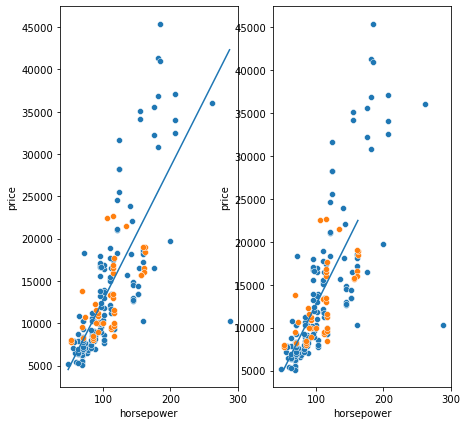

In [30]:
plt.figure(figsize=[7.0,7.0])
plt.subplot(1,2,1)
sns.scatterplot(x=train_x_hp.horsepower,y=train_y)
sns.scatterplot(x=test_x_hp.horsepower,y=test_y)
sns.lineplot(x=train_x_hp.horsepower,y=predict_xhp)
plt.subplot(1,2,2)
sns.scatterplot(x=train_x_hp.horsepower,y=train_y)
sns.scatterplot(x=test_x_hp.horsepower,y=test_y)
sns.lineplot(x=test_x_hp.horsepower,y=predicted_xhp)

In [31]:
data1 = data.price[data.fueltype=="gas"]
data2 = data.price[data.fueltype=="diesel"]
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=-1.6122331626981947, pvalue=0.10846478964915504)

In [32]:
data1 = data.price[data.aspiration=="std"]
data2 = data.price[data.aspiration=="turbo"]
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=-2.5435689960906815, pvalue=0.011717247320503188)

In [33]:
data1 = data.price[data.noofdoors=="two"]
data2 = data.price[data.noofdoors=="four"]
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=-0.6631964576574294, pvalue=0.5079571218353705)

In [34]:
data1 = data.price[data.bodystyle=="convertible"]
data2 = data.price[data.bodystyle=="hatchback"]
data3 = data.price[data.bodystyle=="sedan"]
data4 = data.price[data.bodystyle=="wagon"]
data5 = data.price[data.bodystyle=="hardtop"]
stats.f_oneway(data1,data2,data2,data3,data4,data5)

F_onewayResult(statistic=11.416530288089934, pvalue=5.269793547310443e-10)

In [35]:
data1 = data.price[data.drivewheels=="rwd"]
data2 = data.price[data.drivewheels=="fwd"]
data3 = data.price[data.drivewheels=="4wd"]
stats.f_oneway(data1,data2,data3)

F_onewayResult(statistic=67.73579802411511, pvalue=3.07984274260414e-23)

In [36]:
data1 = data.price[data.engtype=="dohc"]
data2 = data.price[data.engtype=="ohcv"]
data3 = data.price[data.engtype=="ohc"]
data4 = data.price[data.engtype=="l"]
data5 = data.price[data.engtype=="rotor"]
data6 = data.price[data.engtype=="ohcf"]
data7 = data.price[data.engtype=="dohcv"]
stats.f_oneway(data1,data2,data3,data4,data5,data6,data7)

F_onewayResult(statistic=8.41976699929087, pvalue=3.8264558339043966e-08)

In [37]:
data1 = data.price[data.cylinders=="four"]
data2 = data.price[data.cylinders=="six"]
data3 = data.price[data.cylinders=="five"]
data4 = data.price[data.cylinders=="three"]
data5 = data.price[data.cylinders=="twelve"]
data6 = data.price[data.cylinders=="two"]
data7 = data.price[data.cylinders=="eight"]
stats.f_oneway(data1,data2,data3,data4,data5,data6,data7)

F_onewayResult(statistic=43.56071481585832, pvalue=1.0872686269905157e-33)

In [38]:
data1 = data.price[data.fuelsystem=="mpfi"]
data2 = data.price[data.fuelsystem=="2bbl"]
data3 = data.price[data.fuelsystem=="mfi"]
data4 = data.price[data.fuelsystem=="1bbl"]
data5 = data.price[data.fuelsystem=="spfi"]
data6 = data.price[data.fuelsystem=="4bbl"]
data7 = data.price[data.fuelsystem=="idi"]
data8 = data.price[data.fuelsystem=="spdi"]
stats.f_oneway(data1,data2,data3,data4,data5,data6,data7,data8)

F_onewayResult(statistic=14.817228592996251, pvalue=1.7866005261647304e-15)

In [45]:
Q3=data.stroke.quantile(0.75)

In [46]:
Q1=data.stroke.quantile(0.25)

In [50]:
IQR=Q3-Q1

In [54]:
IQR

0.30000000000000027

In [51]:
UE = Q3+(1.5*IQR)

In [52]:
LE = Q1-(1.5*IQR)

In [55]:
data1 = data[(data.stroke <= UE) & (data.stroke >= LE)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2c398da5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c399ee7520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c398da5bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c399ee7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c399ee7fd0>],
 'means': []}

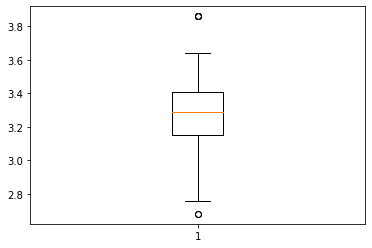

In [56]:
plt.boxplot(data1.stroke)

In [65]:
data.stroke[data.stroke > UE]

Series([], Name: stroke, dtype: float64)

In [66]:
data.stroke.unique().max()

3.8600000000000003

In [67]:
data.stroke.unique().min()

2.07